In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import Random Forest Model classifier
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import seaborn as sns
pd.set_option('max_columns', None)
%matplotlib inline

In [13]:
# Open calendar and listings data
boston_calendar = pd.read_csv("boston_airbnb_data/calendar.csv")
boston_listings = pd.read_csv("boston_airbnb_data/listings.csv")

In [14]:
# Drop price column because we don't need it for our analysis
boston_calendar = boston_calendar.drop('price', axis=1)
# Get one column for each variable on for t(true) and one for f(false)
boston_calendar = pd.concat([boston_calendar.drop('available', axis=1), pd.get_dummies(boston_calendar['available'], prefix='available', prefix_sep='_')], axis=1)
# Group by each list id by adding the number of times each list_id is available and unavailable
boston_occupation = boston_calendar.groupby("listing_id").sum()
# Add a column with the occupancy percentage, which is the number of days occupied divided by the total number of days registered
boston_occupation["occupation_percentage"] = boston_occupation["available_f"]*100/(boston_occupation["available_f"]+boston_occupation["available_t"])

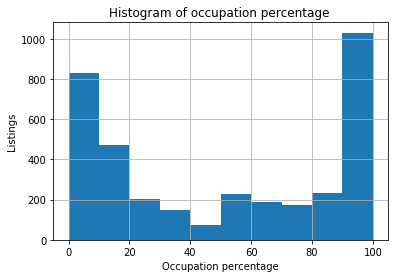

In [15]:
# Create a histrogram 
boston_occupationpercentage_hist = boston_occupation["occupation_percentage"].hist()
boston_occupationpercentage_hist.set_xlabel("Occupation percentage")
boston_occupationpercentage_hist.set_ylabel("Listings")
boston_occupationpercentage_hist.title.set_text('Histogram of occupation percentage ')

In [16]:
def percentage_to_categorical(value,levels):
    '''
    INPUT
    value - A integer or float value from 0 to 100 
    levels -The number of levels or categories into which the 100 percent will be divided 
    
    OUTPUT
    level - A integer that represent the level or category to which the value belongs
    
    This function return the category to which the value belongs,given the number of levels.
    '''
    # Ensures that the value is float
    value = float(value)
    # Defines the upper limit
    up_limit = 100
    # Defines the value that each range will have
    step = 100/levels
    level = levels
    while level > 0:
        if value <= up_limit and value > (up_limit-step):
            return level
        else:
            level -= 1
            up_limit -= step

In [17]:
# Apply function
boston_occupation["occupation_percentage_categoric"] = boston_occupation["occupation_percentage"].apply(lambda x: percentage_to_categorical(x,3))
# Drop columns will no longer be used
boston_occupation = boston_occupation.drop(["available_f","available_t","occupation_percentage"], axis=1)

In [18]:
# Create a consolidate dataframe with all the listings data and the ocupation percentage
df = pd.merge(boston_listings, boston_occupation,left_on="id",right_on="listing_id", how="inner")

In [19]:
# Open the csv file obtained with the function sentiment_comments_todf
boston_sentiment_comments = pd.read_csv("mean_sentiment_comments.csv")
# Rename the columns
boston_sentiment_comments.columns = ['listing_id', 'reviews_sentiment_positive', 'reviews_sentiment_negative',
                                     'reviews_sentiment_neutral','reviews_sentiment_mixed','number_sentiment_reviews']
# Create a consolidate dataframe with all the listings data, the ocupation percentage categoric and the sentiment analysis
df = pd.merge(df, boston_sentiment_comments,left_on="id",right_on="listing_id", how="inner")

In [20]:
# Use describe method to display the type of data by column
df.describe(include="all")

id                           listing_url     scrape_id  \
count   2.829000e+03                                  2829  2.829000e+03   
unique           NaN                                  2829           NaN   
top              NaN  https://www.airbnb.com/rooms/7240775           NaN   
freq             NaN                                     1           NaN   
mean    7.685814e+06                                   NaN  2.016091e+13   
std     4.401384e+06                                   NaN  0.000000e+00   
min     3.353000e+03                                   NaN  2.016091e+13   
25%     4.109165e+06                                   NaN  2.016091e+13   
50%     7.746589e+06                                   NaN  2.016091e+13   
75%     1.186687e+07                                   NaN  2.016091e+13   
max     1.484378e+07                                   NaN  2.016091e+13   

       last_scraped                      name  \
count          2829                      2829   
unique            1                      2776   
top      2016-09-07  Lux 2BR by Fenway w/WiFi   
freq           2829                         8   
mean            NaN                       NaN   
std             NaN                       NaN   
min             NaN                       NaN   
25%             NaN                       NaN   
50%             NaN                       NaN   
75%             NaN                       NaN   
max             NaN                       NaN   

                                                  summary  \
count                                                2698   
unique                                               2497   
top     The unit is stylishly designed for comfort, va...   
freq                                                   13   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space  \
count                                                2124   
unique                                               1952   
top     The studio's kitchenette comes equipped with a...   
freq                                                   12   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                                2829                2829   
unique                                               2734                   1   
top     Private room in a HOSTEL exclusive for Airbnb ...                none   
freq                                                    7                2829   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  \
count           

Column analysis

column: id, dimension: property, strategy: drop - id of the listing <br>
column: listing_url, dimension: none, strategy: drop - out of scope for this analysis <br>
column: scrape_id, dimension: none, strategy: drop - out of scope for this analysis <br>
column: last_scraped, dimension: none, strategy: drop - out of scope for this analysis <br>
column: name, dimension: property, strategy: drop - out of scope for this analysis <br>
column: summary, dimension: property, strategy: drop - out of scope for this analysis <br>
column: space, dimension: property, strategy: drop - out of scope for this analysis <br>
column: description, dimension: property, strategy: drop - out of scope for this analysis <br>
column: experiences_offered, dimension: property, strategy: drop - all values 0 <br>
column: neighborhood_overview, dimension: property, strategy: drop - out of scope for this analysis <br>
column: notes, dimension: property, strategy: drop - out of scope for this analysis <br>
column: transit, dimension: property, strategy: drop - out of scope for this analysis <br>
column: access, dimension: property, strategy: drop - out of scope for this analysis <br>
column: interaction, dimension: property, strategy: drop - out of scope for this analysis <br>
column: house_rules, dimension: property, strategy: drop - out of scope for this analysis <br>
column: thumbnail_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: medium_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: xl_picture_url, dimension: property, strategy: drop - out of scope for this analysis <br>
column: host_id, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_name, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_since, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_location, dimension: host, strategy: transform to column host in city <br>
column: host_about, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_response_time, dimension: host, strategy: get dummies <br>
column: host_response_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_acceptance_rate, dimension: host, strategy: clear characters to be continuous variable <br>
column: host_is_superhost, dimension: host, strategy: get dummies <br>
column: host_thumbnail_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_picture_url, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_neighbourhood, dimension: host, strategy: drop - out of scope for this analysis <br>
column: host_listings_count, dimension: host, strategy: drop - redundant with the following column <br>
column: host_total_listings_count, dimension: host, strategy: none <br>
column: host_verifications, dimension: host, strategy: apply special function to get dummies <br>
column: host_has_profile_pic, dimension: host, strategy: get dummies <br>
column: host_identity_verified, dimension: host, strategy: get dummies <br>
column: street, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood, dimension: property, strategy: drop - out of scope for this analysis <br>
column: neighbourhood_cleansed, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: neighbourhood_group_cleansed, dimension: property, strategy: drop - out of scope for this analysis <br>
column: city, dimension: property, strategy: use to filter only properties in Boston and then drop <br>
column: state, dimension: property, strategy: drop - out of scope for this analysis <br>
column: zipcode, dimension: property, strategy: get dummies and experiment geographic variables <br>
column: market, dimension: property, strategy: drop - out of scope for this analysis <br>
column: smart_location, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country_code, dimension: property, strategy: drop - out of scope for this analysis <br>
column: country, dimension: property, strategy: drop - out of scope for this analysis <br>
column: latitude, dimension: property, strategy: drop - none and experiment geographic variables <br>
column: longitude, dimension: property, strategy: drop - none and experiment geographic variables<br>
column: is_location_exact, dimension: property, strategy: drop - out of scope for this analysis <br>
column: property_type, dimension: property, strategy: get dummies <br>
column: room_type, dimension: property, strategy: get dummies <br>
column: accommodates, dimension: property, strategy: none <br>
column: bathrooms, dimension: property, strategy: none <br>
column: bedrooms, dimension: property, strategy: none <br>
column: beds, dimension: property, strategy: none <br>
column: bed_type, dimension: property, strategy: get dummies <br>
column: amenities, dimension: property, strategy: apply special function to get dummies and use in final experiment <br>
column: square_feet, dimension: property, strategy: none <br>
column: price, dimension: property, strategy: clear characters to be continuous variable <br>
column: weekly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: monthly_price, dimension: property, strategy: drop - is closely related to the price column <br>
column: security_deposit, dimension: property, strategy: clear characters to be continuous variable <br>
column: cleaning_fee, dimension: property, strategy: clear characters to be continuous variable <br>
column: guests_included, dimension: property, strategy: none <br>
column: extra_people, dimension: property, strategy: clear characters to be continuous variable <br>
column: minimum_nights, dimension: property, strategy: none <br>
column: maximum_nights, dimension: property, strategy: none <br>
column: calendar_updated, dimension: property, strategy: drop - out of scope for this analysis <br>
column: has_availability, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_30, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_60, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_90, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: availability_365, dimension: property, strategy: Drop because having availability is directly related to having a low occupation percentage <br>
column: calendar_last_scraped, dimension: property, strategy: drop - out of scope for this analysis <br>
column: number_of_reviews, dimension: reviews, strategy: none <br>
column: first_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: last_review, dimension: reviews, strategy: drop - out of scope for this analysis <br>
column: review_scores_rating, dimension: reviews, strategy: none <br>
column: review_scores_accuracy, dimension: reviews, strategy: none <br>
column: review_scores_cleanliness, dimension: reviews, strategy: none <br>
column: review_scores_checkin, dimension: reviews, strategy: none <br>
column: review_scores_communication, dimension: reviews, strategy: none <br>
column: review_scores_location, dimension: reviews, strategy: none <br>
column: review_scores_value, dimension: reviews, strategy: none <br>
column: requires_license, dimension: property, strategy: drop - all values f <br>
column: license, dimension: reviews, property: drop - all values nan <br>
column: jurisdiction_names, dimension: property, strategy: drop - all values nan <br>
column: instant_bookable, dimension: property, strategy: get dummies <br>
column: cancellation_policy, dimension: property, strategy: get dummies <br>
column: require_guest_profile_picture, property: reviews, strategy: get dummies <br>
column: require_guest_phone_verification, dimension: reviews, strategy: get dummies <br>
column: calculated_host_listings_count, dimension: host, strategy: drop - redundant with host_total_listings_count column <br>
column: reviews_per_month, dimension: reviews, strategy: Drop because having more reviews per period of time is directly related to having a high occupation percentage <br>

In [21]:
# Selected columns with the dimension to which they belong
columns_for_analysis = {'host_location':'host','host_response_time':'host','host_response_rate':'host',
                        'host_acceptance_rate':'host','host_is_superhost':'host','host_total_listings_count':'host',
                        'host_verifications':'host','host_has_profile_pic':'host','host_identity_verified':'host',
                        'neighbourhood_cleansed':'property','city':'property','zipcode':'property','latitude':'property',
                        'longitude':'property','property_type':'property','room_type':'property','accommodates':'property',
                        'bathrooms':'property','bedrooms':'property','beds':'property','bed_type':'property',
                        'amenities':'property','square_feet':'property','price':'property','security_deposit':'property',
                        'cleaning_fee':'property','guests_included':'property','extra_people':'property',
                        'minimum_nights':'property','maximum_nights':'property','number_of_reviews':'property',
                        'review_scores_rating':'reviews','review_scores_accuracy':'reviews',
                        'review_scores_cleanliness':'reviews','review_scores_checkin':'reviews',
                        'review_scores_communication':'reviews','review_scores_location':'reviews',
                        'review_scores_value':'reviews','requires_license':'property','instant_bookable':'property',
                        'cancellation_policy':'property','require_guest_profile_picture':'property',
                        'require_guest_phone_verification':'property','reviews_sentiment_positive':'reviews',
                        'reviews_sentiment_negative':'reviews','reviews_sentiment_neutral':'reviews',
                        'reviews_sentiment_mixed':'reviews','number_sentiment_reviews':'reviews',
                        'occupation_percentage_categoric':'output'}

In [22]:
# Filter the dataframe with the selected columns
df = df[columns_for_analysis.keys()]
# Filter the city column to leave only the properties that belong to Boston
df = df[df["city"] == "Boston"]
# Drop the city column because it no longer adds variability to the model
df = df.drop("city",axis=1)

In [24]:
# Create a dataframe with the column name and the percent of missing values per column
percent_missing = df.isnull().sum()*100/len(df)

df_nullrows_percent = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)

# Filter and display missing values dataframe
df_nullrows_percent[df_nullrows_percent["percent_missing"]>0].sort_values(by=['percent_missing'],ascending=False)

-Drop columns: square_feet, security_deposit and cleaning_fee because they have a very high percentage of missing values, and are not critical variables for the analysis<br>
-Review columns, host_response_rate and host_acceptace_rate have two to nine percent of missing values but they are important columns, so they will be filled with the mean<br>
-Host_response_time have 8.3 percent of missing values but is an important column so I will use a dummy nan column for the missing values<br>
-Columns: zipcode,bathrooms,bedrooms,host_location,beds and property_type have a very low percentage of missing values so for those columns the rows that contain nan values will be removed<br>

In [26]:
# Drop columns
df = df.drop(["square_feet","security_deposit","cleaning_fee"],axis=1)
# Extract the % sign and transform the value to float.
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float)
# Extract the $ and "," sign and transform the value to float
df['price'] = df['price'].str.replace('$', '', regex=False)
df['price'] = df['price'].str.replace(',', '', regex=False)
df['price'] = df['price'].astype(float)
df['extra_people'] = df['extra_people'].str.replace('$', '', regex=False)
df['extra_people'] = df['extra_people'].str.replace(',', '', regex=False)
df['extra_people'] = df['extra_people'].astype(float)
# Apply the fill mean function to the select columns
fill_mean_cols = ["review_scores_accuracy","review_scores_location","review_scores_value","review_scores_checkin",
                 "review_scores_communication","review_scores_cleanliness","review_scores_rating",
                 "host_response_rate","host_acceptance_rate"]

fill_mean = lambda col: col.fillna(col.mean())
df[fill_mean_cols] = df[fill_mean_cols].apply(fill_mean)
# Get dummy columns for host_response_time column including nan values
var = "host_response_time"
df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var],prefix=var, prefix_sep='-', drop_first=True,dummy_na=True)], axis=1)
# Drop the remaining nan values
df = df.dropna()

In [31]:
def host_isin_city(host_location):
    '''
    INPUT
    host_location - str value with the location of the host
    
    OUTPUT
    host_isin_city - int 1 or int 0
    
    This function return integer 1 if the host live in Boston, integer 0 if the host does not live in boston.
    '''
    try:
        clean_host_location = host_location.split(",")[0]
        if clean_host_location == "Boston":
            return 1
        else:
            return 0
    except AttributeError:
        return np.nan
    
# Apply function to create new column "host_isin_city"
df['host_isin_city'] = df["host_location"].apply(host_isin_city)
# Drop old column
df = df.drop("host_location",axis=1)

In [32]:
def get_dummies_strlist(df,column_name):
    '''
    INPUT
    df - dataframe to which function will be applied
    column_name - name of the column of the dataframe to which the function will be applied
    
    OUTPUT
    df - dataframe with corresponding dummy columns
    
    This function clean a str with a structure similar to a list or dictionary and return an actual list, 
    then generate a dummy column for each unique element of the list and add the binary value.
    '''

    # Creat a list to save all possible values
    all_items = []
    # Characters to be remove
    replacements = ['"',"'","[","]","{","}"]
    # Loop through all rows in the df
    for index, row in df.iterrows():
        # Select the value based on the column being cleaned
        items = row[column_name]
        # Loop through the characters that need to be removed
        for char in replacements:
            if char in items:
                # Remove the character
                items = items.replace(char,"")
        # Convert already cleaned str value to list
        items = items.split(",")
        # Loop through the items in the list
        for item in items:
            # Check that the item has at least one character
            if len(item) != 0:
                # Clears the item in case it has empty spaces
                clean_item = item.strip()
                clean_item = "{}-{}".format(column_name,clean_item)
                # Check that a column already exists for that item
                if clean_item in df.columns:
                    # If exists assign a value of 1 to that row and column
                    df.loc[index, clean_item] = 1
                else:
                    # If it does not exist create the column and then assign the value of 1 to that row and column
                    df[clean_item] = 0
                    df.loc[index, clean_item] = 1
                    
    # Drop the original column that was transformed
    df = df.drop([column_name], axis=1)
    # Return the new dataframe
    return df

In [110]:
# Apply function to host_verifiations column
df = get_dummies_strlist(df,"host_verifications")

In [111]:
# Apply function to amenities column
df = get_dummies_strlist(df,"amenities")

### Analysis and experiments

In [112]:
# Defines the dataframe with only zipcode for location variable
df_with_zipcode = df.drop(['latitude','longitude','neighbourhood_cleansed'],axis=1)
# Defines the dataframe with only coordinates for location variable
df_with_coordinates = df.drop(['zipcode','neighbourhood_cleansed'],axis=1)
# Defines the dataframe with only neighbourhood for location variable
df_with_neighbourhood = df.drop(['zipcode','latitude','longitude'],axis=1)
# Create de experiment dictionary
location_experiment = {"df_with_zipcode":df_with_zipcode,"df_with_coordinates":df_with_coordinates,
                    "df_with_neighbourhood":df_with_neighbourhood}

In [113]:
def dummi_variables_multipledfs(dfs):
    '''
    INPUT
    dfs - A dictionary with one or more pandas dataframe with categorical variables you want to dummy
    
    OUTPUT
    result_dict - A dictionary with the input pandas dataframes but with dummy columns for each of the categorical columns
    '''
    # Start an empty dictionary
    result_dict = {}
    # Iterate over dictionary keys
    for key in dfs.keys():
        # Extract the pandas dataframe associated with that key
        df = dfs[key]
        # Pull a list of the column names of the categorical variables
        cat_vars = df.select_dtypes(include=['object']).copy().columns
        for var in  cat_vars:
            # For each cat add dummy var, drop original column
            df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var],prefix=var, prefix_sep='-', drop_first=True)], axis=1)
        # Add to the result dictionary the new dataframe with dummy columns 
        result_dict[key]=df
    return result_dict

In [114]:
def experiment_randomforestclassifier(exp_dict,n_repetitions):
    '''
    INPUT
    exp_dict - A dictionary with one or more pandas dataframe
    n_repetitions -Number of times to run Random forest classifier
 
    OUTPUT
    level - A dictionary with the mean accuracy per dataframe obtain with the random forest classifier
    
    '''
    result_dict = {}
    count = 0
    while count < n_repetitions:
        for key in exp_dict.keys():
            df = exp_dict[key]
            #Split data into an X matrix and a response vector y
            y = df['occupation_percentage_categoric']
            x = df.drop('occupation_percentage_categoric', axis=1)
            # Split dataset into training set and test set
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
            #Create a Gaussian Classifier
            rfc=RandomForestClassifier(n_estimators=100,random_state=42)
            #Train the model using the training sets y_pred=clf.predict(X_test)
            rfc.fit(x_train,y_train)
            # Generate prediction
            y_pred=rfc.predict(x_test)
            # Obtain accuracy
            accuracy = metrics.accuracy_score(y_test, y_pred)
            # features
            feature_importance = pd.Series(rfc.feature_importances_,index=list(x.columns)).sort_values(ascending=False)
            # final dict
            try:
                result_dict[key]["accuracy"] += accuracy
            except KeyError:
                result_dict[key] = {"accuracy":accuracy}
        count += 1
        
    # Get the mean, update the result_dict with that value, and graph the results
    x_axis, y_axis = [],[]
    for key in result_dict.keys():
        accuracy_mean = (result_dict[key]["accuracy"])/n_repetitions
        result_dict[key]["accuracy"] = accuracy_mean
        x_axis.append(key)
        y_axis.append(accuracy_mean)
    # Plot the experiment results
    plt.bar(x_axis, y_axis)
    plt.title('Accuracy per experiment')
    plt.xlabel('Experiment')
    plt.ylabel('Accuracy')
    # Get the dowm limit of the y axis
    down_ylim = (math.floor(min(y_axis)*10)/10)
    up_ylim = (math.ceil(max(y_axis)*10)/10)
    plt.ylim(down_ylim,up_ylim)
    plt.show()
    
    return result_dict

In [115]:
# Use the function to get dummy columns for each of the categorical columns in all the dataframes
location_experiment = dummi_variables_multipledfs(location_experiment)

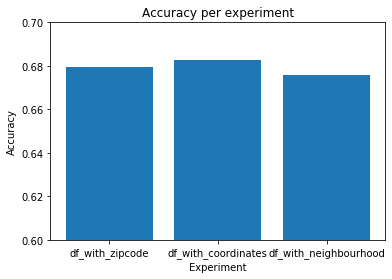

In [116]:
# Use the function to 
location_experiment_results = experiment_randomforestclassifier(location_experiment,40)

In [117]:
location_experiment_results

{'df_with_zipcode': {'accuracy': 0.6794676806083649},
 'df_with_coordinates': {'accuracy': 0.6825728770595689},
 'df_with_neighbourhood': {'accuracy': 0.6756970849176172}}

Using the coordinates variable, now it will be evaluated if the sentiment variables improve the model

In [118]:
# Dataframe with original review variables, sentiment variables, and coordinates as location variable
df_withsentiment = df.drop(['zipcode','neighbourhood_cleansed'],axis=1)
# Dataframe with original review variables and coordinates as location variable
df_withoutsentiment = df.drop(['reviews_sentiment_positive', 'reviews_sentiment_negative','reviews_sentiment_neutral',
                               'reviews_sentiment_mixed','number_sentiment_reviews','zipcode','neighbourhood_cleansed'],axis=1)
# Dataframe with sentiment variables without original review variables and coordinates as location variable
df_without_originalreviews = df.drop(['number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
                                      'review_scores_checkin','review_scores_communication','review_scores_location',
                                      'review_scores_value','zipcode','neighbourhood_cleansed'],axis=1)
# Create de experiment dictionary
sentiment_experiment = {'withsentiment':df_withsentiment,'withoutsentiment':df_withoutsentiment,
                             'without_originalreviews':df_without_originalreviews}

In [120]:
sentiment_experiment = dummi_variables_multipledfs(sentiment_experiment)

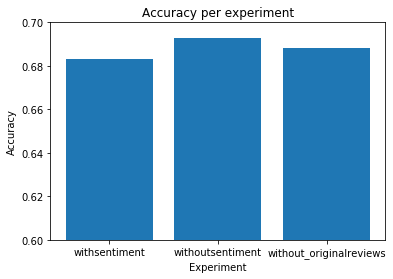

In [121]:
sentiment_experiment_results = experiment_randomforestclassifier(sentiment_experiment,40)

In [122]:
sentiment_experiment_results

{'withsentiment': {'accuracy': 0.6831749049429655},
 'withoutsentiment': {'accuracy': 0.69287072243346},
 'without_originalreviews': {'accuracy': 0.6881812420785806}}

In [123]:
select_df = sentiment_experiment['withoutsentiment'].copy()

In [124]:
def get_dataframe_perdimension(select_df,columns_for_analysis):
    '''
    INPUT
    select_df - dataframe with the final select columns
    columns_for_analysis - A dictionary with the columns of interest and the dimensions to which they belong
 
    OUTPUT
    df_per_dimension - A pandas datraframe per dimension
    df_column_dimension - A pandas dataframe with the column and the  dimension to which it belongs
    '''
    # Dictionary to add columns per dimension
    columns_per_dimension = {}
    # Loop through dataframe columns
    for dummy in select_df.columns:
        # Obtain the original name of the column before get_dummies
        column = dummy.split("-")[0]
        # Check if the column is in our columns of interest and get its dimension
        if column in columns_for_analysis.keys():
            column_dimension = columns_for_analysis[column]
            # Add the values to the dictionary
            if column_dimension in columns_per_dimension.keys() and column_dimension != "output":
                columns_per_dimension[column_dimension].append(dummy)
            elif column_dimension not in columns_per_dimension.keys() and column_dimension != "output":
                columns_per_dimension[column_dimension] = [dummy,"occupation_percentage_categoric"]

    # Dictionary to add dataframe per dimension
    df_per_dimension = {}
    # Loop through dimensions, get the columns from that dimension and filter the datafrane to add to the dictionaray
    for dimension in columns_per_dimension.keys():
        columns = columns_per_dimension[dimension]
        df = select_df[columns]
        df_per_dimension[dimension] = df

    # List to add the column and the dimension to which it belongs
    column_dimension = []
    # Loop through dimensions, get the columns from that dimension and add the pair value to the list
    for dimension in columns_per_dimension.keys():
        for column in columns_per_dimension[dimension]:
            column_dimension.append([column,dimension])
    # Create a dataframe with the column name and the dimension to which it belongs      
    df_column_dimension = pd.DataFrame(column_dimension, columns = ['column','dimension'])
    # Add the all dimensions dataframe to the df_per_dimension dictionary
    df_per_dimension["all_dimensions"] = select_df

    return df_per_dimension, df_column_dimension

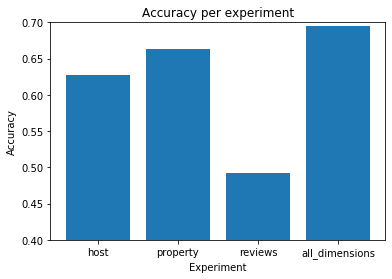

In [126]:
dimension_experiment_results = experiment_randomforestclassifier(df_per_dimension,40)

In [127]:
dimension_experiment_results

{'host': {'accuracy': 0.6271546261089987},
 'property': {'accuracy': 0.6638149556400507},
 'reviews': {'accuracy': 0.4917300380228137},
 'all_dimensions': {'accuracy': 0.6953105196451204}}

### Final model

In [146]:
#Split data into an X matrix and a response vector y
y = select_df['occupation_percentage_categoric']
x = select_df.drop('occupation_percentage_categoric', axis=1)
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=100,random_state=42)
#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(x_train,y_train)
# Generate prediction
y_pred=rfc.predict(x_test)
# Obtain accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
# Create a dataframe with the score per column (variable or feature)
feature_importance = pd.DataFrame([list(x.columns),rfc.feature_importances_]).transpose()
feature_importance = feature_importance.rename(columns={1:'score',0:'column'}).sort_values(by='score',ascending=False)
feature_importance = pd.merge(feature_importance,df_column_dimension ,on='column', how="inner")

In [147]:
# Final accuracy
accuracy

0.7021546261089987

In [148]:
feature_importance

column     score dimension
0              host_total_listings_count  0.058294      host
1                      number_of_reviews  0.052172  property
2                               latitude  0.052155  property
3                              longitude  0.046763  property
4                                  price  0.045553  property
..                                   ...       ...       ...
104                  property_type-Other  0.000119  property
105                       bed_type-Couch  0.000112  property
106                   property_type-Boat  0.000091  property
107                   property_type-Dorm  0.000084  property
108  amenities-Paid Parking Off Premises  0.000013  property

[109 rows x 3 columns]

In [149]:
# Export feature importance dataframe to csv
feature_importance.to_csv("feature_importance.csv", index=False)